## M6 | PROJECT: Kaggle Competition


Predict traffic congestion in 4 major US cities: https://www.kaggle.com/c/bigquery-geotab-intersection-congestion/data 
 
Pick a competition and follow the instructions to make sure you understand the problem, data and submission requirements. Some competitions are closed but you can still submit and see how you are placed on the leader board. 


As you are building a predictive model or models, make sure you follow some of the best practices we have learned so far:
1)    Clean and then visually explore your data before you start the analysis
2)    Don’t just make assumptions, whenever possible, use statistical analysis to test hypotheses and find relationships in the data
3)    Build and compare predictive models in terms of their performance. Note that one competition is in the domain of NLP, the second is on time series, and the third- a standard supervised learning problem. Follow the best practices in each of them. 


You don't need to follow the exact same steps in the project you choose (and not all of them will be applicable) but this should give you a good idea of how an end-to-end executed solution could look like. See how it is easy to understand & follow, and nicely presented in a storyline.

Submit your Jupyter notebook and link to a GitHub repository where you store the code, as well your Kaggle link. What is your position in the leader board?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import xgboost as xgb
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

/Users/isadoracosta/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
#loading the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### 1. Data Analysis

In [3]:
#looking at the first 5 values of the train dataset
train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [4]:
#looking at the first 5 values of the test dataset
test.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,City
0,0,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
1,1,1,33.75094,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,Atlanta
2,2,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta
3,3,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
4,4,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta


In [5]:
#printing the shape of both trainsets
print ("shape of train dataset :", train.shape)
print ("shape of test dataset :", test.shape)

shape of train dataset : (856387, 28)
shape of test dataset : (1921357, 13)


In [6]:
#looking at the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856387 entries, 0 to 856386
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RowId                    856387 non-null  int64  
 1   IntersectionId           856387 non-null  int64  
 2   Latitude                 856387 non-null  float64
 3   Longitude                856387 non-null  float64
 4   EntryStreetName          848239 non-null  object 
 5   ExitStreetName           850100 non-null  object 
 6   EntryHeading             856387 non-null  object 
 7   ExitHeading              856387 non-null  object 
 8   Hour                     856387 non-null  int64  
 9   Weekend                  856387 non-null  int64  
 10  Month                    856387 non-null  int64  
 11  Path                     856387 non-null  object 
 12  TotalTimeStopped_p20     856387 non-null  float64
 13  TotalTimeStopped_p40     856387 non-null  float64
 14  Tota

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921357 entries, 0 to 1921356
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   RowId            int64  
 1   IntersectionId   int64  
 2   Latitude         float64
 3   Longitude        float64
 4   EntryStreetName  object 
 5   ExitStreetName   object 
 6   EntryHeading     object 
 7   ExitHeading      object 
 8   Hour             int64  
 9   Weekend          int64  
 10  Month            int64  
 11  Path             object 
 12  City             object 
dtypes: float64(2), int64(5), object(6)
memory usage: 190.6+ MB


In [8]:
#checking missing or NaN values
train.isnull().sum()

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8148
ExitStreetName             6287
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64

In [9]:
#checking missing or NaN values
test.isnull().sum()

RowId                  0
IntersectionId         0
Latitude               0
Longitude              0
EntryStreetName    19198
ExitStreetName     15587
EntryHeading           0
ExitHeading            0
Hour                   0
Weekend                0
Month                  0
Path                   0
City                   0
dtype: int64

In [10]:
#dropping all NaN values
train.dropna(inplace=True)
test.dropna(inplace=True)

In [11]:
#looking at how many different cities
train.City.unique()

array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

In [12]:
test.City.unique()

array(['Atlanta', 'Boston', 'Chicago', 'Philadelphia'], dtype=object)

#### 1.1 Exploratory Data Analysis

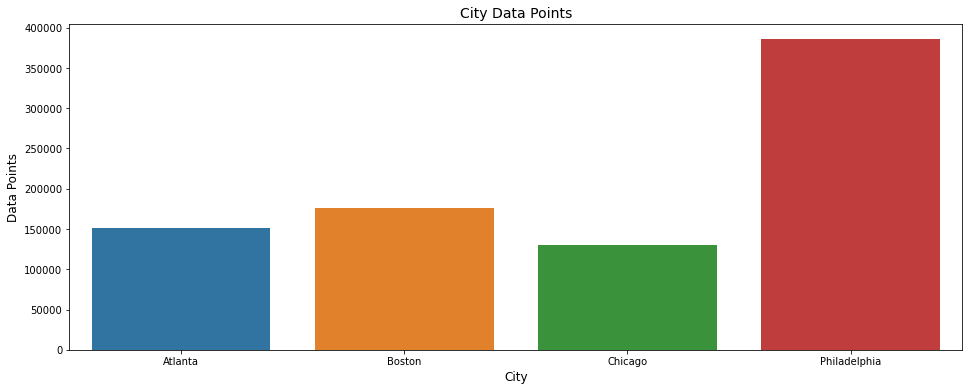

In [13]:
#plotting the data points for each city
plt.figure(figsize=(16,6))
sns.countplot(x="City", data=train)
plt.title("City Data Points", fontsize=14)
plt.ylabel("Data Points", fontsize=12)
plt.xlabel("City", fontsize=12)
None

Here we can see that there are more data points in the city of Philadelphia than any other city.

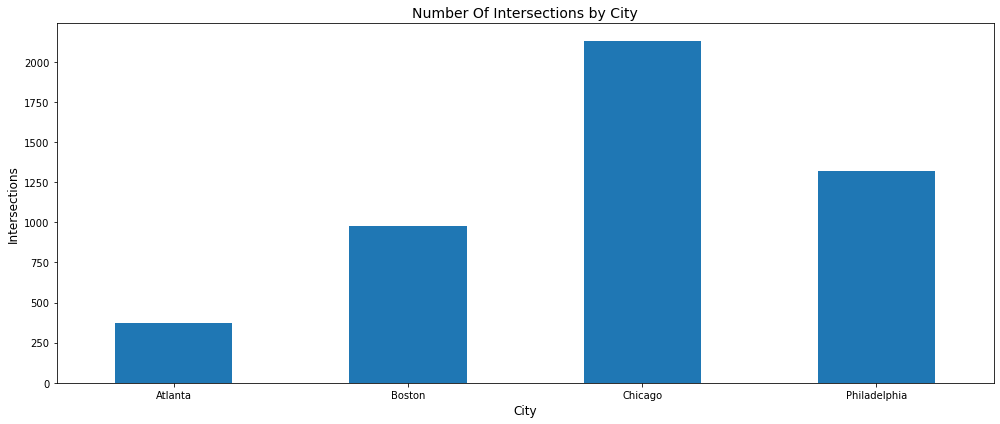

In [14]:
#plotting the number of intersections for each city
plt.subplots(figsize=(14, 6))
train.groupby(['City']).IntersectionId.nunique().sort_index().plot(kind='bar')
plt.title("Number Of Intersections by City", fontsize=14)
plt.ylabel("Intersections", fontsize=12)
plt.xlabel("City", fontsize=12)
plt.xticks(rotation=360)
plt.tight_layout()

We can tell from this graph that there are more intersections in Chicago.

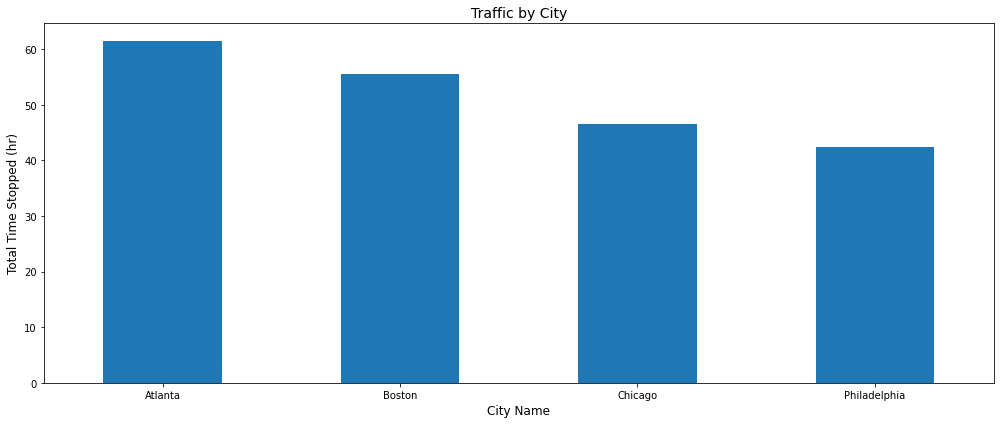

In [15]:
#calculating total time stopped to plot the most traffic in each city in hours
train['TotalTimeStopped'] = train['TotalTimeStopped_p20']+train['TotalTimeStopped_p40']+train['TotalTimeStopped_p50']+train['TotalTimeStopped_p60']+train['TotalTimeStopped_p80']

plt.figure(figsize=(14,6))
train.groupby('City')['TotalTimeStopped'].mean().plot(kind='bar')
plt.title("Traffic by City", fontsize=14)
plt.ylabel("Total Time Stopped (hr)", fontsize=12)
plt.xlabel("City Name", fontsize=12)
plt.xticks(rotation=360)
plt.tight_layout()

Atlanta shows that people are stopped in traffic for more hours, and right after comes Boston.

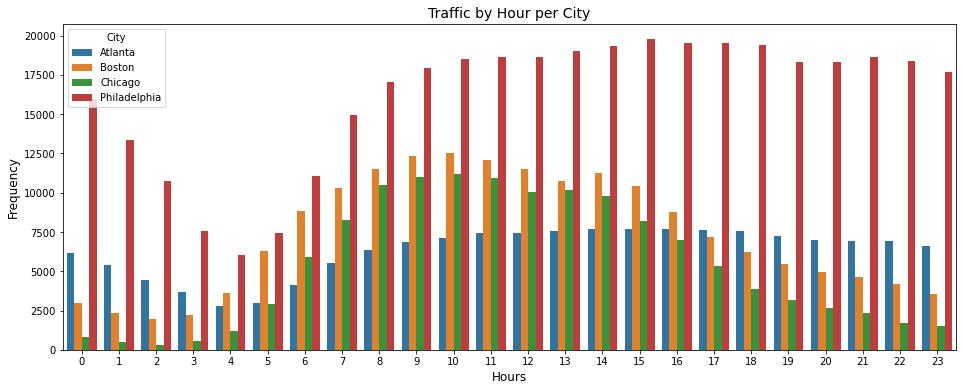

In [16]:
#plotting the traffic volume by hour in different cities. 
plt.figure(figsize=(16,6))
sns.countplot(x="Hour", data=train, hue='City')
plt.title("Traffic by Hour per City", fontsize=14)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Hours", fontsize=12)
None

In Philadelphia, traffic is always high from 8h to 23h, but there is always traffic, even at 3am, whereas in other cities, there is not a lot of traffic in the middle of the night. We can observe that in all of the cities traffic from midnight to 4am is lower than during the day, as to be expected.

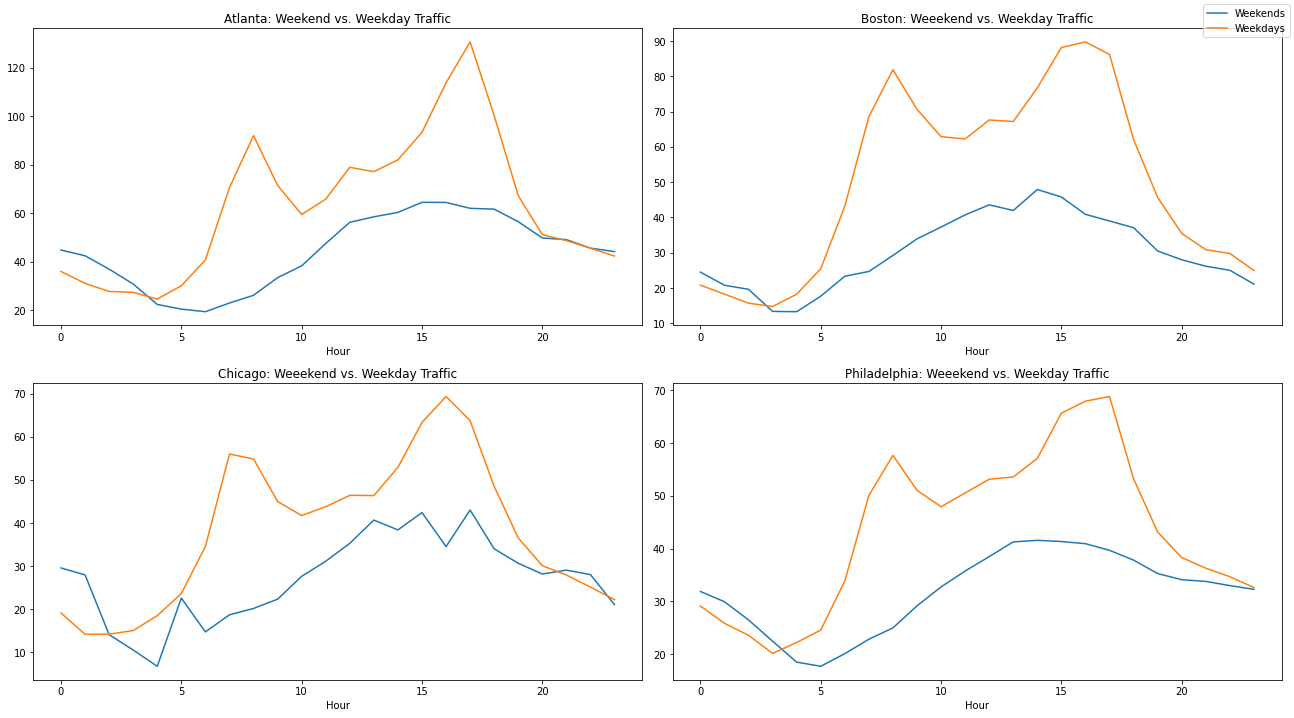

In [17]:
#plotting traffic by hour in different cities comparing weekend vs weekday
Atlanta = train[train['City']=='Atlanta']
Boston = train[train['City']=='Boston']
Chicago = train[train['City']=='Chicago']
Philadelphia = train[train['City']=='Philadelphia']

fig, axes = plt.subplots(nrows=2, ncols=2)

#plotting for Atlanta
Atlanta_Weekend = Atlanta[Atlanta['Weekend'] == 1].groupby(['Hour'])['TotalTimeStopped'].mean()
Atlanta_Weekday = Atlanta[Atlanta['Weekend'] == 0].groupby(['Hour'])['TotalTimeStopped'].mean()
Atlanta_Weekend.plot(ax=axes[0,0],figsize=(18,10),title='Atlanta: Weekend vs. Weekday Traffic', label='Weekends')
Atlanta_Weekday.plot(ax=axes[0,0],figsize=(18,10), label='Weekdays')

#plotting for Boston
Boston_Weekend = Boston[Boston['Weekend'] == 1].groupby(['Hour'])['TotalTimeStopped'].mean()
Boston_Weekday = Boston[Boston['Weekend'] == 0].groupby(['Hour'])['TotalTimeStopped'].mean()
Boston_Weekend.plot(ax=axes[0,1],figsize=(18,10),title='Boston: Weeekend vs. Weekday Traffic', label='Weekends')
Boston_Weekday.plot(ax=axes[0,1],figsize=(18,10), label='Weekdays')

#plotting for Chicago
Chicago_Weekend = Chicago[Chicago['Weekend'] == 1].groupby(['Hour'])['TotalTimeStopped'].mean()
Chicago_Weekday = Chicago[Chicago['Weekend'] == 0].groupby(['Hour'])['TotalTimeStopped'].mean()
Chicago_Weekend.plot(ax=axes[1,0],figsize=(18,10),title='Chicago: Weeekend vs. Weekday Traffic', label='Weekends')
Chicago_Weekday.plot(ax=axes[1,0],figsize=(18,10), label='Weekdays')

#plotting for Philadelphia
Philadelphia_Weekend = Philadelphia[Philadelphia['Weekend'] == 1].groupby(['Hour'])['TotalTimeStopped'].mean()
Philadelphia_Weekday = Philadelphia[Philadelphia['Weekend'] == 0].groupby(['Hour'])['TotalTimeStopped'].mean()
Philadelphia_Weekend.plot(ax=axes[1,1],figsize=(18,10),title='Philadelphia: Weeekend vs. Weekday Traffic', label='Weekends')
Philadelphia_Weekday.plot(ax=axes[1,1],figsize=(18,10), label='Weekdays')

fig.legend(labels=['Weekends','Weekdays'])
fig.tight_layout()

We can tell in the 4 different cities that traffic is much higher in weekdays (during the day) but it is higher on the weeknd in the middle of the night. This is to be expected because during the day on a weekday, people are going to work and on the weekend, at night they are going out. We can also tell from these graphs that there are two peak times on weekdays, at around 8am and 6pm, which is the time people are commuting to and from work. 

### 2. Feature Engineering

In [18]:
#converting city, entryheading and exitheading columns into objects type
train = pd.get_dummies(train, columns=['City' ], prefix=['City'], drop_first=False)
train = pd.get_dummies(train, columns=['EntryHeading' ], prefix=['entry'], drop_first=False)
train = pd.get_dummies(train, columns=['ExitHeading' ], prefix=['exit'], drop_first=False)

test = pd.get_dummies(test, columns=['City' ], prefix=['City'], drop_first=False)
test = pd.get_dummies(test, columns=['EntryHeading' ], prefix=['entry'], drop_first=False)
test = pd.get_dummies(test, columns=['ExitHeading' ], prefix=['exit'], drop_first=False)

In [19]:
#target 
y1 = train["TotalTimeStopped_p20"]
y2 = train["TotalTimeStopped_p50"]
y3 = train["TotalTimeStopped_p80"]

y4 = train["DistanceToFirstStop_p20"]
y5 = train["DistanceToFirstStop_p50"]
y6 = train["DistanceToFirstStop_p80"]

#feature list:
train = train[["IntersectionId", "Hour","Weekend","Month","Latitude", "Longitude",
              "City_Atlanta", "City_Boston", "City_Chicago", "City_Philadelphia",
              "entry_E","entry_N","entry_NE","entry_NW","entry_S","entry_SE","entry_SW","entry_W",
              "exit_E","exit_N","exit_NE","exit_NW","exit_S","exit_SE","exit_SW","exit_W"]]

In [20]:
#scaling longitude and latitude in train dataset
scale_lat_long_train = StandardScaler()
for col in ["Latitude", "Longitude"]:
    scale_lat_long_train.fit(train[col].values.reshape(-1, 1))
    train[col] = scale_lat_long_train.transform(train[col].values.reshape(-1, 1))

In [21]:
#checking to see if scaling worked
train.head()

,IntersectionId,Hour,Weekend,Month,Latitude,Longitude,City_Atlanta,City_Boston,City_Chicago,City_Philadelphia,...,entry_SW,entry_W,exit_E,exit_N,exit_NE,exit_NW,exit_S,exit_SE,exit_SW,exit_W
0,0,0,0,6,-2.007147,-1.097597,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,6,-2.007147,-1.097597,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,6,-2.007147,-1.097597,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,6,-2.007147,-1.097597,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,2,0,6,-2.007147,-1.097597,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
#scaling longitude and latitude in test dataset
scale_lat_long_test = StandardScaler()
for col in ["Latitude", "Longitude"]:
    scale_lat_long_test.fit(test[col].values.reshape(-1, 1))
    test[col] = scale_lat_long_test.transform(test[col].values.reshape(-1, 1))   

In [23]:
#checking to see if scaling worked
test.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,Hour,Weekend,Month,Path,...,entry_SW,entry_W,exit_E,exit_N,exit_NE,exit_NW,exit_S,exit_SE,exit_SW,exit_W
0,0,1,-2.064656,-1.09837,Peachtree Street Southwest,Peachtree Street Southwest,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,...,0,0,0,0,1,0,0,0,0,0
1,1,1,-2.064656,-1.09837,Peachtree Street Southwest,Mitchell Street Southwest,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,...,1,0,0,0,0,0,0,1,0,0
2,2,1,-2.064656,-1.09837,Peachtree Street Southwest,Peachtree Street Southwest,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,...,1,0,0,0,0,0,0,0,1,0
3,3,1,-2.064656,-1.09837,Peachtree Street Southwest,Peachtree Street Southwest,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,...,0,0,0,0,1,0,0,0,0,0
4,4,1,-2.064656,-1.09837,Peachtree Street Southwest,Peachtree Street Southwest,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,...,1,0,0,0,0,0,0,0,1,0


### 3. Model Selection

#### Linear Regression

In [24]:
#making function for the linear regression model
def linear_regression(target):
    
    #splitting data into train and test
    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)
    
    #instantiating model
    linreg = LinearRegression()

    #fitting model
    linreg.fit(X_train, y_train)

    #predicting model
    y_pred = linreg.predict(X_test)

    #printing scores and comparing actual values with predicted 
    print('Test Score: %.4f' % linreg.score(X_test, y_test)) 
    print('Training Score: %.4f' % linreg.score(X_train, y_train)) 
    print ('r2 Score: ', r2_score(y_test, y_pred))
    print ('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

In [25]:
#evaluating different targets
linear_regression(y1)

Test Score: 0.0062
Training Score: 0.0062
r2 Score:  0.0062445569516738075
RMSE:  6.987962741918254


In [26]:
linear_regression(y2)

Test Score: 0.0206
Training Score: 0.0216
r2 Score:  0.02062247385823579
RMSE:  15.426861691515018


In [27]:
linear_regression(y3)

Test Score: 0.0362
Training Score: 0.0373
r2 Score:  0.036198741725557926
RMSE:  27.628832510587635


In [28]:
linear_regression(y4)

Test Score: 0.0052
Training Score: 0.0052
r2 Score:  0.005157573323977371
RMSE:  30.199943856421523


In [29]:
linear_regression(y5)

Test Score: 0.0114
Training Score: 0.0124
r2 Score:  0.011439370238578883
RMSE:  75.682456750223


In [30]:
linear_regression(y6)

Test Score: 0.0196
Training Score: 0.0206
r2 Score:  0.019619321726244032
RMSE:  160.0201268791712


#### Decision Tree

In [31]:
#making function for the decisition tree model
def decisiontree_regressor(target):
    
    #splitting data into train and test
    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)
    
    #instantiating model
    dt_r = DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=3)

    #fitting model
    dt_r.fit(X_train, y_train)

    #predicting model
    y_pred = dt_r.predict(X_test)

    #printing scores and comparing actual values with predicted 
    print('Test Score: %.4f' % dt_r.score(X_test, y_test)) 
    print('Training Score: %.4f' % dt_r.score(X_train, y_train)) 
    print ('r2 Score: ', r2_score(y_test, y_pred))
    print ('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

In [32]:
#evaluating different targets
decisiontree_regressor(y1)

Test Score: 0.0097
Training Score: 0.0106
r2 Score:  0.009740595604987856
RMSE:  6.975660061064565


In [33]:
decisiontree_regressor(y2)

Test Score: 0.0326
Training Score: 0.0331
r2 Score:  0.03261274951082893
RMSE:  15.332137259899069


In [34]:
decisiontree_regressor(y3)

Test Score: 0.0448
Training Score: 0.0455
r2 Score:  0.044792234565574796
RMSE:  27.505383932778845


In [35]:
decisiontree_regressor(y4)

Test Score: 0.0062
Training Score: 0.0068
r2 Score:  0.006248075128629904
RMSE:  30.183387403716797


In [36]:
decisiontree_regressor(y5)

Test Score: 0.0199
Training Score: 0.0194
r2 Score:  0.01988369097779863
RMSE:  75.35852235708099


In [37]:
decisiontree_regressor(y6)

Test Score: 0.0276
Training Score: 0.0269
r2 Score:  0.027602946968328768
RMSE:  159.36724158887586


#### Ridge and Lasso

In [38]:
#making function for the ridge and lasso model
def ridge_lasso(Model, target):
    
    #splitting data into train and test
    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)
    
    #instantiating model
    obj= Model(alpha =0.0007, random_state=42)

    #fitting model
    obj.fit(X_train, y_train)

    #predicting model
    y_pred = obj.predict(X_test)

    #printing scores and comparing actual values with predicted 
    print('Test Score: %.4f' % obj.score(X_test, y_test)) 
    print('Training Score: %.4f' % obj.score(X_train, y_train)) 
    print ('r2 Score: ', r2_score(y_test, y_pred))
    print ('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

In [39]:
#evaluating different targets with Ridge model
ridge_lasso(Ridge, y1)

Test Score: 0.0062
Training Score: 0.0062
r2 Score:  0.006244568984324572
RMSE:  6.987962699612214


In [40]:
ridge_lasso(Ridge, y2)

Test Score: 0.0206
Training Score: 0.0216
r2 Score:  0.0206225021546117
RMSE:  15.426861468656995


In [41]:
ridge_lasso(Ridge, y3)

Test Score: 0.0362
Training Score: 0.0373
r2 Score:  0.03619876576259484
RMSE:  27.62883216605848


In [42]:
ridge_lasso(Ridge, y4)

Test Score: 0.0052
Training Score: 0.0052
r2 Score:  0.005157591006368367
RMSE:  30.199943588033683


In [43]:
ridge_lasso(Ridge, y5)

Test Score: 0.0114
Training Score: 0.0124
r2 Score:  0.011439401839518193
RMSE:  75.68245554056692


In [44]:
ridge_lasso(Ridge, y6)

Test Score: 0.0196
Training Score: 0.0206
r2 Score:  0.01961936367392847
RMSE:  160.02012345576944


In [45]:
#evaluating different targets with Lasso model
ridge_lasso(Lasso, y1)

Test Score: 0.0054
Training Score: 0.0052
r2 Score:  0.005391790873591207
RMSE:  6.990960370640154


In [46]:
ridge_lasso(Lasso, y2)

Test Score: 0.0193
Training Score: 0.0200
r2 Score:  0.01928007814402255
RMSE:  15.437430578936072


In [ ]:
ridge_lasso(Lasso, y3)

In [ ]:
ridge_lasso(Lasso, y4)

In [ ]:
ridge_lasso(Lasso, y5)

In [ ]:
ridge_lasso(Lasso, y6)

#### XGB Regressor

In [ ]:
#making function for the xgb regressor model
def xgb_regressor (target):

    #splitting data into train and test
    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)
    
    #instantiating model
    XG = XGBRegressor()

    #fitting model
    XG.fit(X_train, y_train)

    #predicting model
    y_pred = XG.predict(X_test)

    #printing scores and comparing actual values with predicted 
    print('Test Score: %.4f' % XG.score(X_test, y_test)) 
    print('Training Score: %.4f' % XG.score(X_train, y_train)) 
    print ('r2 Score: ', r2_score(y_test, y_pred))
    print ('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
#evaluating different targets with xgb regressor
xgb_regressor(y1)

In [ ]:
xgb_regressor(y2)

In [ ]:
xgb_regressor(y3)

In [ ]:
xgb_regressor(y4)

In [ ]:
xgb_regressor(y5)

In [ ]:
xgb_regressor(y6)

### 4. Model Prediction

XGB Regressor is performing better in all targets than the rest of the models that we trained, so we are using the XGB regressor to the test data and to predict our model

In [ ]:
#creating a dataset with less columns to it is the same length as our train dataset
X_test = test[["IntersectionId", "Hour","Weekend","Month","Latitude", "Longitude",
              "City_Atlanta", "City_Boston", "City_Chicago", "City_Philadelphia",
              "entry_E","entry_N","entry_NE","entry_NW","entry_S","entry_SE","entry_SW","entry_W",
              "exit_E","exit_N","exit_NE","exit_NW","exit_S","exit_SE","exit_SW","exit_W"]]

In [ ]:
#to make a model prediction, we can fit and predict for each different target
xgb = XGBRegressor()

In [ ]:
xgb.fit(train, y1)
pred_1 = xgb.predict(X_test)

In [ ]:
xgb.fit(train, y2)
pred_2 = xgb.predict(X_test)

In [ ]:
xgb.fit(train, y3)
pred_3 = xgb.predict(X_test)

In [ ]:
xgb.fit(train, y4)
pred_4 = xgb.predict(X_test)

In [ ]:
xgb.fit(train, y5)
pred_5 = xgb.predict(X_test)

In [ ]:
xgb.fit(train, y6)
pred_6 = xgb.predict(X_test)

In [ ]:
#reading the sample submission file
submission_file = pd.read_csv("sample_submission.csv")

In [ ]:
#appending all predictions 
prediction = []
for i in range(len(pred_1)):
    for j in [pred_1,pred_2,pred_3,pred_4,pred_5,pred_6]:
        prediction.append(j[i])
        
#creating submission file with target column for predictions
submission_file["Target"] = pd.Series(prediction)
submission_file.to_csv("submission_final_predictions.csv", index = False)